In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

In [15]:
dcdict = dict()
for task in [
    'synthetic_classification_cnum10_dist10_skew0.0_seed0',
    'synthetic_classification_cnum10_dist10_skew0.5_seed0',
    'synthetic_classification_cnum10_dist10_skew1.0_seed0',
    'synthetic_classification_cnum10_dist11_skew1.0_seed0'
]:
    if 'dist11' in task:
        key = 'IID'
    else:
        key = 'Non-IID ' + task.replace('_seed0', ''). \
            replace('synthetic_classification_cnum10_dist10_skew', '')
    with open('../fedtask/{}/data.json'.format(task), 'r') as f:
        data = json.load(f)
        dcdict[key] = {client: Counter(data[client]['dtrain']['y']) for client in data['client_names']}

In [16]:
dcdict['IID']

{'Client00': Counter({2: 367,
          4: 372,
          8: 519,
          7: 400,
          6: 81,
          0: 169,
          3: 147,
          5: 62,
          1: 32,
          9: 1}),
 'Client01': Counter({8: 270,
          4: 201,
          0: 98,
          7: 164,
          2: 184,
          3: 74,
          6: 47,
          5: 23,
          1: 13,
          9: 1}),
 'Client02': Counter({8: 178,
          0: 60,
          7: 116,
          6: 35,
          2: 123,
          1: 15,
          4: 123,
          5: 24,
          3: 41,
          9: 1}),
 'Client03': Counter({8: 142,
          2: 77,
          3: 45,
          1: 9,
          7: 103,
          4: 98,
          0: 36,
          6: 17,
          5: 10}),
 'Client04': Counter({2: 67,
          7: 62,
          6: 26,
          8: 107,
          3: 24,
          4: 75,
          0: 47,
          5: 13,
          1: 8}),
 'Client05': Counter({7: 49,
          8: 96,
          4: 71,
          2: 57,
          0: 24,
     

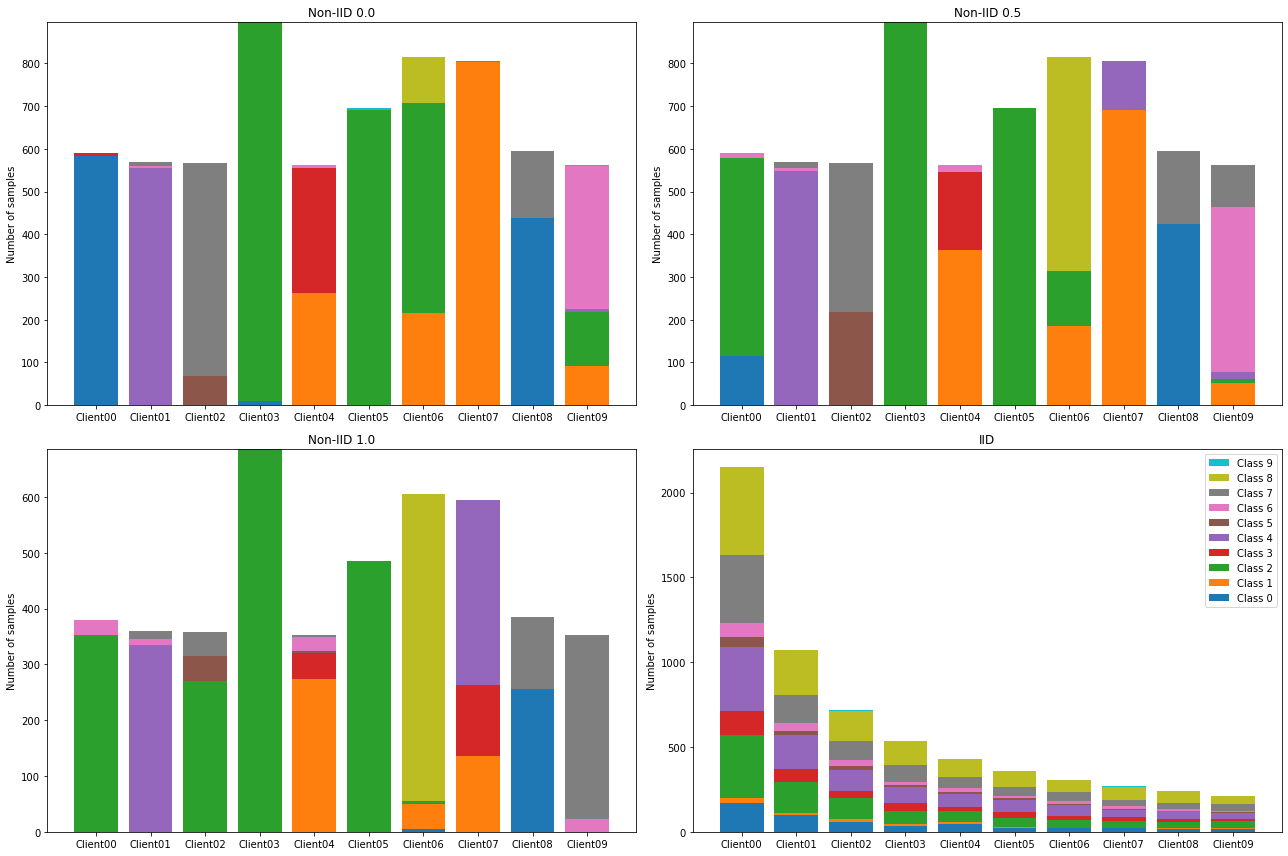

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(18)
for index, (key, value) in enumerate(dcdict.items()):
    for class_id in range(10):
        ax[index // 2, index % 2].bar(
            x=list(value.keys()),
            height=[v[class_id] for v in value.values()],
            bottom=[sum(v[j] for j in range(class_id)) for v in value.values()],
            label='Class {}'.format(class_id)
        )
        ax[index // 2, index % 2].set_title(key)
        ax[index // 2, index % 2].set_ylabel('Number of samples')
handles, labels = ax[1, 1].get_legend_handles_labels()
ax[1, 1].legend(handles[::-1], labels[::-1])
fig.tight_layout()
plt.savefig('../plots/Data count.jpg')
plt.show()

In [29]:
for key, value in dcdict.items():
    print(key)
    print(sum(sum(v.values()) for v in value.values()))

Non-IID 0.0
6659
Non-IID 0.5
6659
Non-IID 1.0
4559
IID
6291


In [13]:
dcdict = dict()
for task in [
    'synthetic_classification_cnum12_dist10_skew0.5_seed0',
    'synthetic_classification_cnum12_dist11_skew1.0_seed0'
]:
    if 'dist11' in task:
        key = 'IID'
    else:
        key = 'Non-IID'
    with open('../fedtask/{}/data.json'.format(task), 'r') as f:
        data = json.load(f)
        dcdict[key] = {client: Counter(data[client]['dtrain']['y']) for client in data['client_names']}

Non-IID
IID


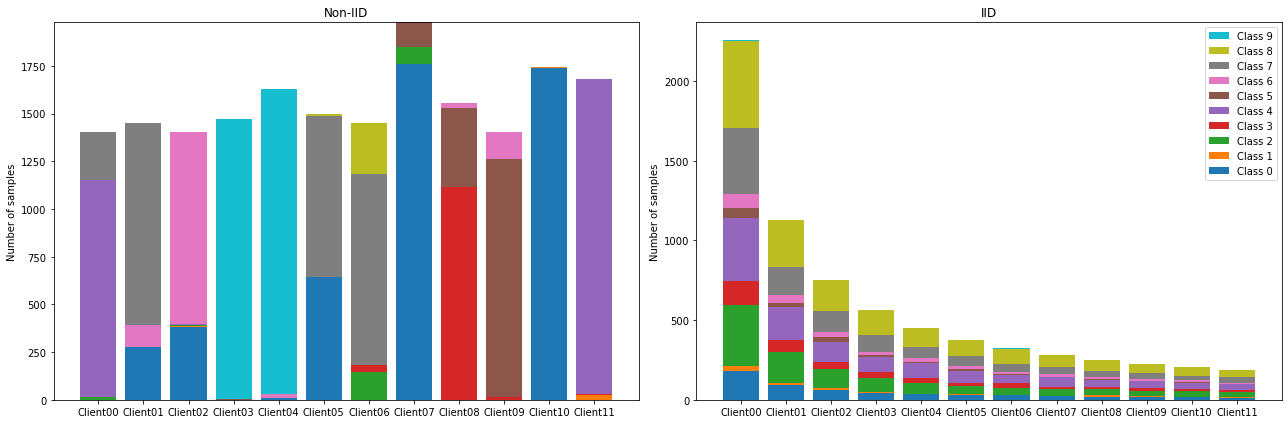

In [16]:
fig, ax = plt.subplots(ncols=2)
fig.set_figheight(6)
fig.set_figwidth(18)
for index, (key, value) in enumerate(dcdict.items()):
    print(key)
    for class_id in range(10):
        ax[index % 2].bar(
            x=list(value.keys()),
            height=[v[class_id] for v in value.values()],
            bottom=[sum(v[j] for j in range(class_id)) for v in value.values()],
            label='Class {}'.format(class_id)
        )
        ax[index % 2].set_title(key)
        ax[index % 2].set_ylabel('Number of samples')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[::-1], labels[::-1])
fig.tight_layout()
plt.savefig('../plots/Data count.jpg')
plt.show()